In [2]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df03 = pd.read_csv('cgss2003.csv', header = 0)

In [5]:
df03me1 = df03.loc[:,['id','sitetype','birth','ethnic','educ','party','mnglvl01',
                      'adrank01','prof01','wkunit01','suplvl01',
                      'incyear','certifct','sentdown','army','replacem',
                      'assignm','applyfor','jobagent','hrexch','recomm','selfemp',
                      'otherch','invitehr','recruitm','intrahr','keychann','noweek',
                      'keyprsn','krelat','sestatus','grprich','grpmass','grpcity',
                      'grpprpty','grpmanag','grpedu','grpindus','soelvl','class']]

In [6]:
df03me1['birth'].describe()

count    5894.000000
mean     1959.619274
std        13.113594
min      1926.000000
25%      1950.000000
50%      1960.000000
75%      1970.000000
max      1988.000000
Name: birth, dtype: float64

In [7]:
def unitrk(x):
    if x < 1 or x == 7:
        return 1
    elif x == 6:
        return 2
    elif x == 5:
        return 3
    elif x == 4:
        return 4
    elif x == 3:
        return 5
    elif x == 2:
        return 6
    else:
        return 7

In [8]:
df03f = df03.loc[:,['id','f_educ','f_poltc','f_wkunit','f_unitrk','f_hktype','f_hksite','f_ethnic']]

In [9]:
df03m = df03.loc[:,['id','m_educ','m_poltc','m_unit','m_unitrk','m_hktype','m_hksite','m_ethnic']]

In [10]:
df03s = df03.loc[:,['id','s_educ','s_poltc','s_unit','s_unitrk','s_hktype','s_hksite']]

In [11]:
df03me1.head()

,id,sitetype,birth,ethnic,educ,party,mnglvl01,adrank01,prof01,wkunit01,...,sestatus,grprich,grpmass,grpcity,grpprpty,grpmanag,grpedu,grpindus,soelvl,class
0,1,1,1958,1,3,2,0,-3,0,2,...,2,3,2,1,3,3,3,3,3,3
1,2,1,1983,1,9,2,-3,-3,-3,-3,...,2,2,1,1,2,1,1,3,4,4
2,3,1,1957,1,3,1,0,-2,0,-2,...,2,3,3,1,3,3,2,3,3,-2
3,4,1,1940,1,1,2,0,-3,0,2,...,2,3,2,1,2,3,2,3,3,3
4,5,1,1936,1,0,2,-3,-3,-3,-3,...,3,2,2,1,2,3,2,3,5,5


In [12]:
df03f_new = df03f.loc[:,['id','f_educ','f_poltc','f_wkunit',
                  'f_unitrk','f_hktype','f_ethnic']]
df03m_new = df03m.loc[:,['id','m_educ','m_poltc','m_wkunit',
                  'm_unitrk','m_hktype','m_ethnic']]
df03me1 = df03me1.loc[:,['id','sitetype','birth','ethnic',
                         'educ','party','incyear','mnglvl01','wkunit01','suplvl01']]

/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [13]:
def mnglv(x):
    if int(x) < 0:
        return 0
    else:
        return int(x)

In [14]:
df03me1['mnglvl01'] = df03me1['mnglvl01'].apply(lambda x : mnglv(x))

In [15]:
df03me1['mnglvl01'].describe()

count    5894.000000
mean        0.154564
std         0.441407
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: mnglvl01, dtype: float64

In [16]:
df03me1['mnglvl01'] = df03me1['mnglvl01'].fillna(0)

In [17]:
df03m['m_unitrk'] = df03m['m_unitrk'].apply(lambda x : unitrk(x))
df03f['f_unitrk'] = df03f['f_unitrk'].apply(lambda x : unitrk(x))

In [18]:
#Replacem,Assignm,'Applyfor','Jobagent','Hrexch',
#'Recomm','Selfemp','Otherch','Invitehr','Recruitm','Intrahr','Keychann'

def replace(x):
    if x < 0:
        return 1
    elif x == 1:
        return 2
    else:
        return x

In [19]:
def income(x):
    if x == -3 or x == -2 or x == -1:
        return np.nan
    elif x < 0:
        return 0
    else:
        return x

In [33]:
df03me1['sitetype'] = df03me1['sitetype'].apply(lambda x : site(x))

In [34]:
df03me1.head()

,id,sitetype,birth,ethnic,educ,party,incyear,mnglvl01,wkunit01,suplvl01
0,1,5,1958,1,3,2,-2,0,2,3
1,2,5,1983,1,9,2,-2,0,-3,-3
2,3,5,1957,1,3,1,-2,0,-2,-2
3,4,5,1940,1,1,2,-2,0,2,3
4,5,5,1936,1,0,2,-2,0,-3,-3


In [35]:
df03me1['age'] = df03me1['birth'].apply(lambda x : age(x))
df03me1['age'].mean()

43.38072616219885

In [36]:
df03me1['ethnic'] = df03me1['ethnic'].apply(lambda x : ethni(x))

In [37]:
df03me1['ethnic'] = df03me1['ethnic'].apply(lambda x : ethni(x))
df03me1['party'] = df03me1['party'].apply(lambda x : party(x))

In [38]:
df03me1['income'] = df03me1['incyear'].apply(lambda x : income(x))
np.mean(df03me1['income'])

9779.29254191559

In [39]:
df03me1['income'] = df03me1['income'].fillna(9779)

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


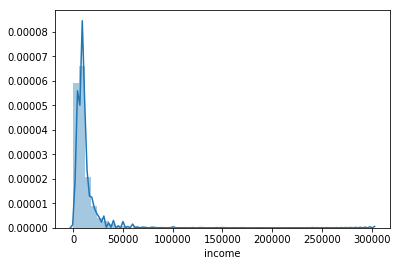

In [40]:
#histogram
sns.distplot(df03me1['income']);

In [41]:
def hk(x):
    if int(x) < 0 or (int(x) > 2 and int(x) < 7):
        return 0
    else:
        return 1

In [24]:
def cat1(x):
    if x < 0:
        return 0
    else:
        x

In [25]:
def sup(x):
    if x < 0 or x == 7:
        return 1
    elif x == 6:
        return 2
    elif x == 5:
        return 3
    elif x == 4:
        return 4
    elif x == 3:
        return 5
    elif x == 2:
        return 6
    elif x == 1:
        return 7
    else:
        return 0

In [26]:
def ethni(x):
    if int(x) == 1:
        return 1
    else:
        return 0

In [27]:
def party(x):
    if int(x) != 1:
        return 0
    else:
        return int(x)

In [28]:
def site(x):
    if int(x) < 0:
        return 1
    elif int(x) == 1:
        return 5
    elif int(x) == 2:
        return 4
    elif int(x) == 3:
        return 3
    else:
        return 2

In [29]:
def age(x):
    if int(x) > 0:
        return (2003 - int(x))
    else:
        return np.NaN

In [30]:
def fun(x):
    if int(x) == 12 or int(x) < 0:
        return 0
    elif int(x) == 11:
        return 3
    else:
        return int(x)    

In [42]:
df03f.loc[:,'f_educ'] = df03f.loc[:,'f_educ'].apply(lambda x : fun(x))
df03m.loc[:,'m_educ'] = df03m.loc[:,'m_educ'].apply(lambda x : fun(x))
#df03s.loc[:,'s_educ'] = df03s.loc[:,'s_educ'].apply(lambda x : fun(x))
df03me1.loc[:,'educ'] = df03me1.loc[:,'educ'].apply(lambda x : fun(x))

In [43]:
def unit(x):
    if x < 0:
        return 8
    else:
        return x

In [44]:
df03me1['educ'].corr(df03f['f_educ'])

0.32902062882725197

In [45]:
df03me1['educ'].corr(df03m['m_educ'])

0.347734525349976

In [46]:
df03m = df03.loc[:,['id','m_educ','m_poltc','m_unit','m_unitrk','m_hktype','m_hksite','m_ethnic']]

In [47]:
df03m['m_poltc'] = df03m['m_poltc'].apply(lambda x : party(x))

In [48]:
df03f['f_poltc'] = df03f['f_poltc'].apply(lambda x : party(x))

In [49]:
def others(x):
    if x <= 1:
        return 1
    elif x == 2:
        return 7
    elif x == 3:
        return 6
    elif x == 4:
        return 5
    elif x == 5:
        return 4
    elif x == 6:
        return 3
    elif x == 7:
        return 2

In [50]:
df03f['f_wkunit'] = df03f['f_wkunit'].apply(lambda x : unit(x))

In [51]:
df03m['m_wkunit'] = df03m['m_unit'].apply(lambda x : unit(x))

In [52]:
df03me1['wkunit01'] = df03me1['wkunit01'].apply(lambda x : unit(x))

In [53]:
df03me1['suplvl01'] = df03me1['suplvl01'].apply(lambda x : others(x))

In [54]:
df03m['m_hktype'] = df03m['m_hktype'].apply(lambda x : hk(x))
df03f['f_hktype'] = df03f['f_hktype'].apply(lambda x : hk(x))

In [55]:
df03f_new = df03f.loc[:,['id','f_educ','f_poltc','f_wkunit',
                  'f_unitrk','f_hktype']]
df03m_new = df03m.loc[:,['id','m_educ','m_poltc','m_wkunit',
                  'm_unitrk','m_hktype']]
df03me1 = df03me1.loc[:,['id','sitetype','age','ethnic',
                         'educ','party','income','mnglvl01',
                         'wkunit01','suplvl01']]

In [56]:
df03me1['wkunit01'].apply(lambda x : others(x)).describe()

count    4504.000000
mean        5.827265
std         1.607749
min         1.000000
25%         5.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: wkunit01, dtype: float64

In [57]:
df03_parent = pd.merge(df03f_new,df03m_new,on='id',how='inner')
df03all = pd.merge(df03me1,df03_parent,on='id',how='inner')

In [62]:
df03dsc = df03all.drop(columns
             = 'id').describe()

In [59]:
df03all.describe()

,id,sitetype,age,ethnic,educ,party,income,mnglvl01,wkunit01,suplvl01,f_educ,f_poltc,f_wkunit,f_unitrk,f_hktype,m_educ,m_poltc,m_wkunit,m_unitrk,m_hktype
count,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000,5894.000000
mean,4294.546318,3.921785,43.380726,0.944690,3.346963,0.182728,9779.257550,0.154564,4.087886,3.763828,1.730404,0.230913,4.744656,3.005599,0.533424,1.027655,0.055819,6.338480,-0.010519,0.552766
std,2876.825781,1.055473,13.113594,0.228605,2.347521,0.386476,11926.042811,0.441407,2.457874,2.367380,2.129628,0.421453,2.770867,1.955070,0.498924,1.952277,0.229592,2.495397,3.103218,0.497250
min,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-3.000000,0.000000,1.000000,-3.000000,0.000000
25%,1765.250000,3.000000,33.000000,1.000000,2.000000,0.000000,3800.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,-2.000000,0.000000
50%,3784.500000,4.000000,43.000000,1.000000,3.000000,0.000000,8400.000000,0.000000,3.000000,5.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,0.000000,8.000000,-2.000000,1.000000
75%,7129.500000,5.000000,53.000000,1.000000,5.000000,0.000000,11254.500000,0.000000,6.000000,6.000000,2.000000,0.000000,8.000000,4.000000,1.000000,1.000000,0.000000,8.000000,3.750000,1.000000
max,9390.000000,5.000000,77.000000,1.000000,10.000000,1.000000,300000.000000,3.000000,8.000000,7.000000,13.000000,1.000000,8.000000,7.000000,1.000000,13.000000,1.000000,8.000000,7.000000,1.000000


In [63]:
df03dsc.to_excel('df03dsc.xls')

In [235]:
df03all.std()

id           2876.825781
sitetype        1.055473
age            13.113594
ethnic          0.228605
educ            2.347521
party           0.386476
income      11926.042811
mnglvl01        0.441407
wkunit01        2.457874
suplvl01        2.367380
f_educ          2.129628
f_poltc         0.421453
f_wkunit        2.770867
f_unitrk        1.955070
f_hktype        0.498924
m_educ          1.952277
m_poltc         0.229592
m_wkunit        2.495397
m_unitrk        3.103218
m_hktype        0.497250
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ca2583dd0>,
      dtype=object)

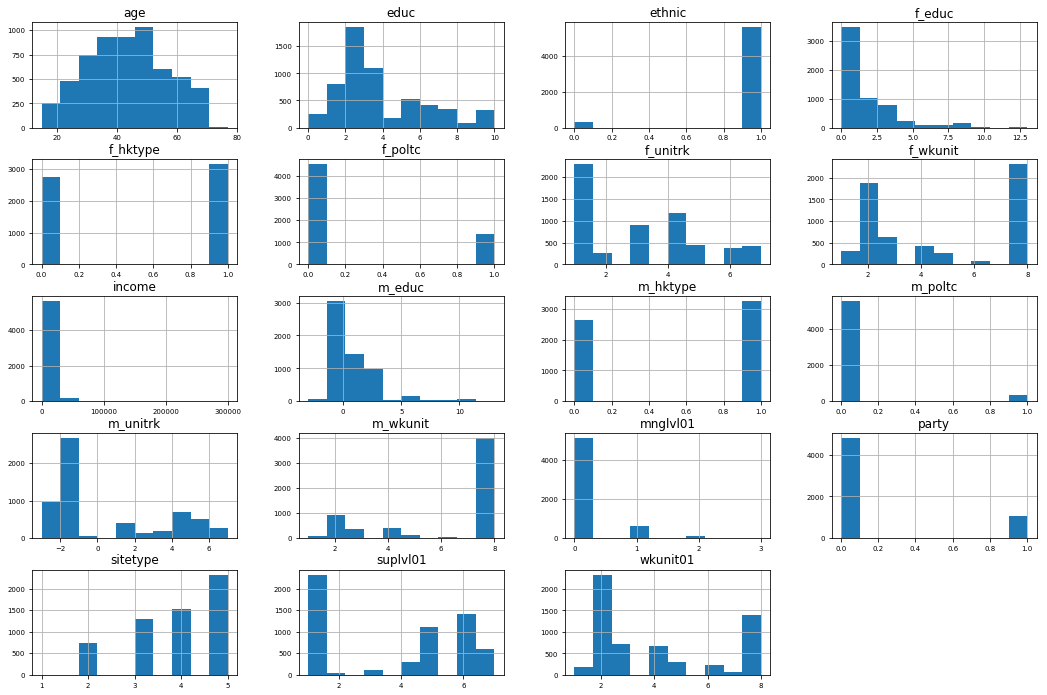

In [236]:
df03all.drop(columns = 'id').hist(xlabelsize=7,ylabelsize=7,figsize=(18,12))

In [237]:
dummy_ranksm = pd.get_dummies(df03all['m_wkunit'], prefix='m_wkunit')
dummy_ranksm.head()

,m_wkunit_1,m_wkunit_2,m_wkunit_3,m_wkunit_4,m_wkunit_5,m_wkunit_6,m_wkunit_7,m_wkunit_8
0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [238]:
dummy_ranksf = pd.get_dummies(df03all['f_wkunit'], prefix='f_wkunit')
dummy_ranksf.head()

,f_wkunit_1,f_wkunit_2,f_wkunit_3,f_wkunit_4,f_wkunit_5,f_wkunit_6,f_wkunit_7,f_wkunit_8
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [239]:
dummy_ranks = pd.get_dummies(df03all['wkunit01'], prefix='wkunit')
dummy_ranks.head()

,wkunit_1,wkunit_2,wkunit_3,wkunit_4,wkunit_5,wkunit_6,wkunit_7,wkunit_8
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [265]:
keep = ['income','sitetype','age','ethnic','educ','party',
        'mnglvl01','wkunit01','suplvl01',
       'f_educ','f_poltc','f_unitrk','f_hktype',
       'm_educ','m_poltc','m_unitrk','m_hktype']

In [266]:
std = ['sitetype','age','ethnic','educ','party',
       'f_educ','f_poltc','f_unitrk','f_hktype',
       'm_educ','m_poltc','m_unitrk','m_hktype']

In [267]:
names = ['income','sitetype','age','ethnic','educ','party','mnglvl01',
        'wkunit01','suplvl01','f_educ','f_poltc','f_unitrk','f_hktype',
       'm_educ','m_poltc','m_unitrk','m_hktype','wkunit_1.0',
       'wkunit_2.0','wkunit_3.0','wkunit_4.0','wkunit_5.0',
       'wkunit_6.0','wkunit_7.0','m_wkunit_1.0',
       'm_wkunit_2.0','m_wkunit_3.0','m_wkunit_4.0','m_wkunit_5.0',
       'm_wkunit_6.0','m_wkunit_7.0','f_wkunit_1.0',
       'f_wkunit_2.0','f_wkunit_3.0','f_wkunit_4.0','f_wkunit_5.0',
       'f_wkunit_6.0','f_wkunit_7.0']

In [268]:
df03std = df03all[keep].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [269]:
data = df03std.join(dummy_ranks)
dataf = data.join(dummy_ranksf)
datam = dataf.join(dummy_ranksm)
print datam.head()

     income  sitetype       age  ethnic  educ  party  mnglvl01  wkunit01  \
0  0.032597       1.0  0.483871     1.0   0.3    0.0       0.0  0.142857   
1  0.032597       1.0  0.080645     1.0   0.9    0.0       0.0  1.000000   
2  0.032597       1.0  0.500000     1.0   0.3    1.0       0.0  1.000000   
3  0.032597       1.0  0.774194     1.0   0.1    0.0       0.0  0.142857   
4  0.032597       1.0  0.838710     1.0   0.0    0.0       0.0  1.000000   

   suplvl01    f_educ     ...      f_wkunit_7  f_wkunit_8  m_wkunit_1  \
0  0.833333  0.000000     ...               0           1           0   
1  0.000000  0.076923     ...               0           1           0   
2  0.000000  0.307692     ...               0           0           0   
3  0.833333  0.000000     ...               0           0           0   
4  0.000000  0.230769     ...               0           1           0   

   m_wkunit_2  m_wkunit_3  m_wkunit_4  m_wkunit_5  m_wkunit_6  m_wkunit_7  \
0           0           0  

In [270]:
df2 = datam.rename(columns={'wkunit_1':'w_government',
       'wkunit_2':'w_state-owned com',
       'wkunit_3':'w_state-owned ins',
       'wkunit_4':'w_collective','wkunit_5':'w_self-employed',
       'wkunit_6':'w_private','wkunit_7':'w_foreign-funded',
       'wkunit_8':'w_others','m_wkunit_1':'mw_government',
       'm_wkunit_2':'mw_state-owned com',
       'm_wkunit_3':'mw_state-owned ins',
       'm_wkunit_4':'mw_collective','m_wkunit_5':'mw_self-employed',
       'm_wkunit_6':'mw_private','m_wkunit_7':'mw_foreign-funded',
       'm_wkunit_8':'mw_others',
       'f_wkunit_1':'fw_government',
       'f_wkunit_2':'fw_state-owned com',
       'f_wkunit_3':'fw_state-owned ins',
       'f_wkunit_4':'fw_collective','f_wkunit_5':'fw_self-employed',
       'f_wkunit_6':'fw_private','f_wkunit_7':'fw_foreign-funded',
       'f_wkunit_8':'fw_others'})

In [271]:
corr = df2.corr()  #计算变量之间的相关系数矩阵

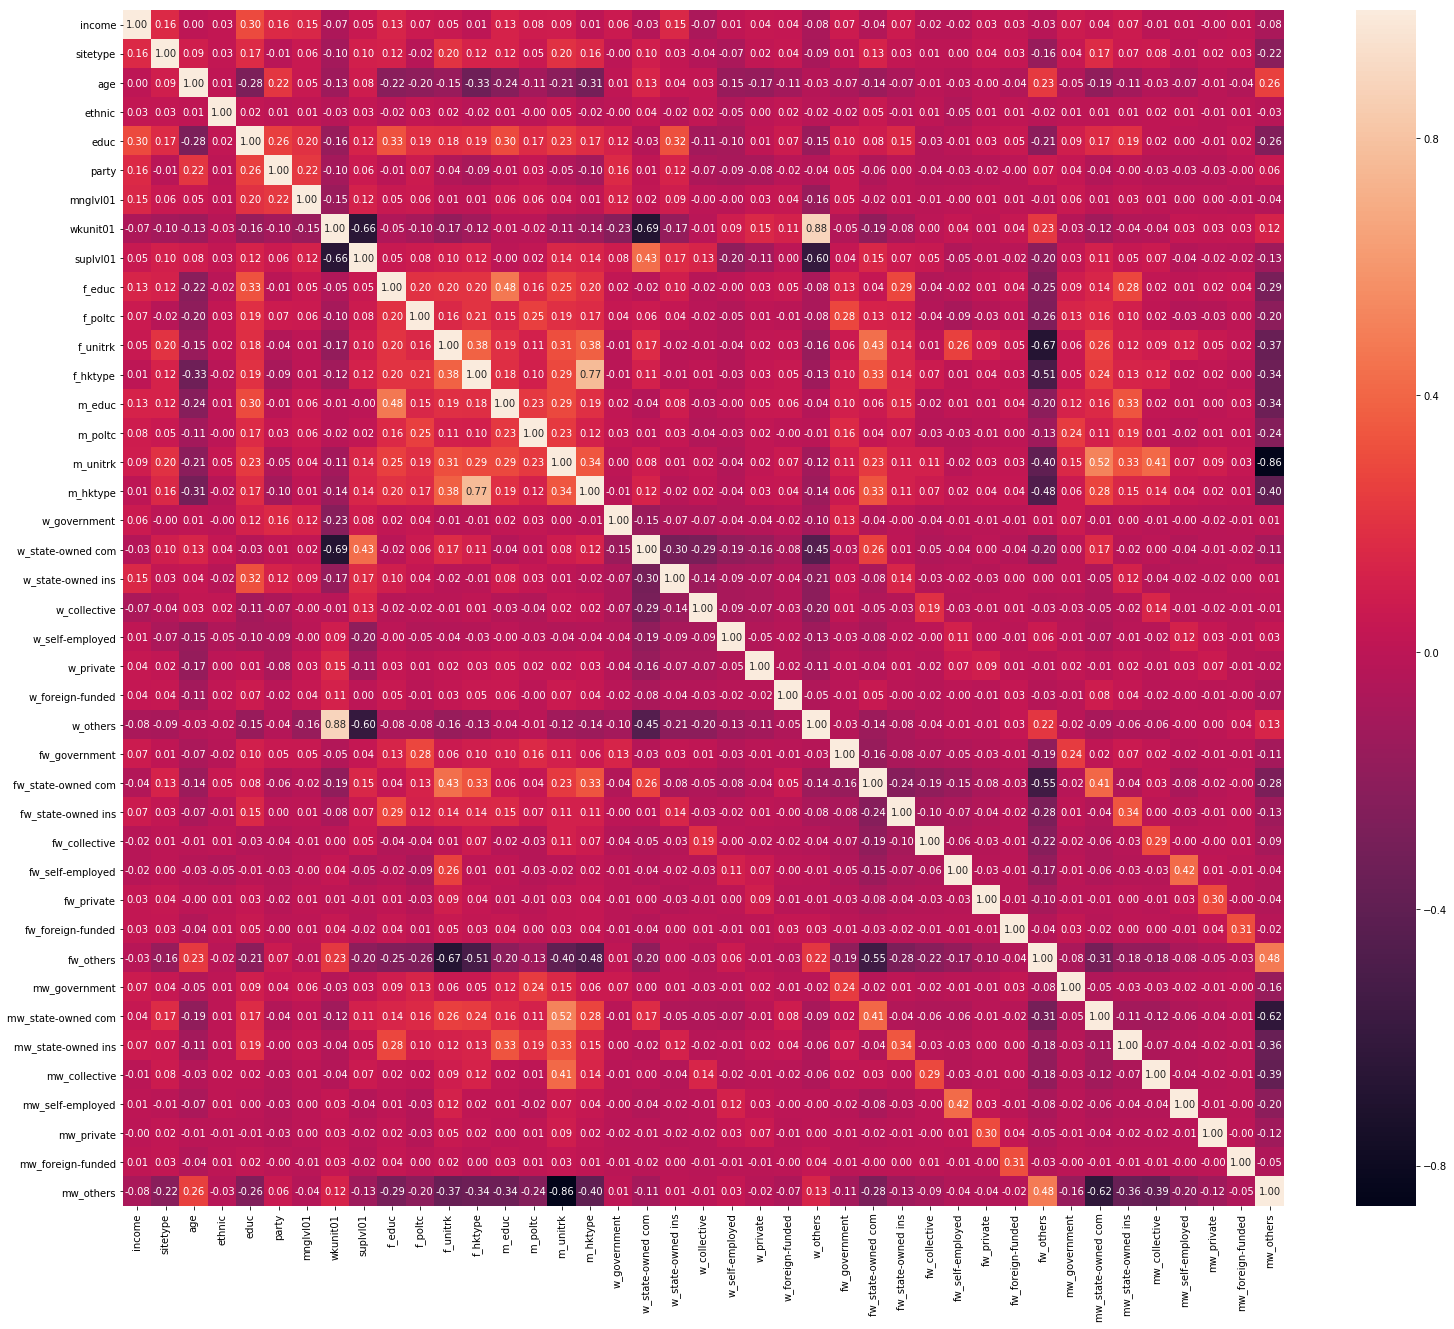

In [300]:
f, ax = plt.subplots(figsize=(26, 22))
sns.heatmap(corr, annot=True, ax=ax, fmt=".2f")

In [273]:
from sklearn import linear_model
X_train = df2.drop(['income','sitetype'], axis=1)
y = df2['income']
model = linear_model.LinearRegression() 
model.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [274]:
print model.intercept_
print model.coef_

0.0024980865382443103
[ 0.01709328  0.00407568  0.04218134  0.00539586  0.0165446   0.00296611
  0.00188301  0.00588604  0.00040294  0.0070718  -0.002001    0.01125946
  0.00260103  0.00383775 -0.00023487 -0.00100483 -0.00453696  0.00170941
 -0.00861899  0.0070431   0.0063193   0.00565381 -0.00656484  0.00337328
 -0.00533839  0.00095072 -0.00073079 -0.01004824  0.00222299  0.00789363
  0.00167681  0.00614988  0.00022143 -0.00399665 -0.00240842  0.00373671
 -0.00511127  0.00274671 -0.00133839]


In [275]:
import statsmodels.api as sm

In [276]:
X=df2.drop(['income','sitetype'], axis=1)
X=sm.add_constant(X)
y=df2['income']
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     25.06
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          1.62e-149
Time:                        22:06:54   Log-Likelihood:                 11057.
No. Observations:                5894   AIC:                        -2.204e+04
Df Residuals:                    5858   BIC:                        -2.180e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0017      0.003      0.554      0.580      -0.004       0.008
age                    0.0171      0.003      6.055      0.000       0.012       0.023
ethnic                 0.0041      0.002      1.906      0.057      -0.000       0.008
educ                   0.0422      0.003     15.977      0.000       0.037       0.047
party                  0.0054      0.001      3.832      0.000       0.003       0.008
mnglvl01               0.0165      0.003      4.754      0.000       0.010       0.023
wkunit01               0.0034      0.001      2.294      0.022       0.000       0.006
suplvl01               0.0019      0.002      1.097      0.273      -0.001       0.005
f_educ                 0.0059      0.004      1.629      0.103      -0.001       0.013
f_poltc                0.0004      0.001      0.311      0.756      -0.002       0.003
f_unitrk               0.0071      0.002      3.300      0.001       0.003       0.011
f_hktype              -0.0020      0.002     -1.262      0.207      -0.005       0.001
m_educ                 0.0113      0.005      2.325      0.020       0.002       0.021
m_poltc                0.0026      0.002      1.123      0.262      -0.002       0.007
m_unitrk               0.0038      0.003      1.190      0.234      -0.002       0.010
m_hktype              -0.0002      0.002     -0.149      0.881      -0.003       0.003
w_government          -0.0006      0.002     -0.241      0.809      -0.005       0.004
w_state-owned com     -0.0042      0.001     -3.310      0.001      -0.007      -0.002
w_state-owned ins      0.0020      0.002      1.210      0.226      -0.001       0.005
w_collective          -0.0084      0.002     -5.128      0.000      -0.012      -0.005
w_self-employed        0.0072      0.002      3.371      0.001       0.003       0.011
w_private              0.0064      0.002      2.694      0.007       0.002       0.011
w_foreign-funded       0.0057      0.004      1.363      0.173      -0.003       0.014
w_others              -0.0066      0.002     -4.203      0.000      -0.010      -0.004
fw_government          0.0036      0.003      1.416      0.157      -0.001       0.009
fw_state-owned com    -0.0051      0.002     -2.887      0.004      -0.009      -0.002
fw_state-owned ins     0.0012      0.002      0.554      0.579      -0.003       0.005
fw_collective         -0.0005      0.002     -0.230      0.818      -0.005       0.004
fw_self-employed      -0.0098      0.003     -3.530      0.000      -0.015      -0.004
fw_private             0.0024      0.004      0.596      0.551      -0.006       0.010
fw_foreign-funded      0.0081      0.010      0.838      0.402      -0.011       0.027
fw_others              0.0019      0.002      0.969      0.333      -0.002       0.006
mw_government          0.0064      0.0

In [277]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=2000,random_state=0,n_jobs=-1)
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [278]:
features = X.columns[1:]

In [279]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [280]:
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) age                            0.198918
 2) ethnic                         0.135626
 3) educ                           0.067558
 4) party                          0.057338
 5) mnglvl01                       0.057138
 6) wkunit01                       0.054816
 7) suplvl01                       0.046139
 8) f_educ                         0.036820
 9) f_poltc                        0.029024
10) f_unitrk                       0.028035
11) f_hktype                       0.026619
12) m_educ                         0.026455
13) m_poltc                        0.022267
14) m_unitrk                       0.020598
15) m_hktype                       0.015983
16) w_government                   0.014596
17) w_state-owned com              0.013721
18) w_state-owned ins              0.013561
19) w_collective                   0.011635
20) w_self-employed                0.010931
21) w_private                      0.010033
22) w_foreign-funded               0.009900
23) w_others                    

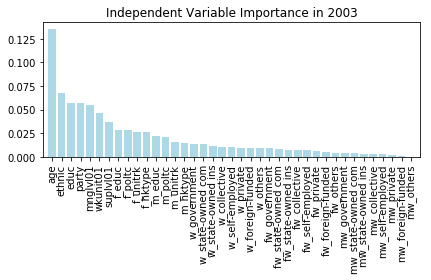

In [281]:
plt.title('Independent Variable Importance in 2003')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
plt.tight_layout()
plt.show()

In [283]:
X=df2.drop(['income','educ','age','party','mnglvl01','wkunit01','suplvl01','sitetype', \
             'w_government','w_state-owned com','w_state-owned ins','w_collective',
             'w_self-employed','w_private','w_foreign-funded','w_others'], axis=1)
y=df2['educ']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     55.68
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          9.21e-231
Time:                        22:10:42   Log-Likelihood:                 760.58
No. Observations:                5894   AIC:                            -1473.
Df Residuals:                    5870   BIC:                            -1313.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1723      0.018      9.503      0.000       0.137       0.208
ethnic                 0.0169      0.012      1.385      0.166      -0.007       0.041
f_educ                 0.2560      0.020     12.561      0.000       0.216       0.296
f_poltc                0.0372      0.007      5.060      0.000       0.023       0.052
f_unitrk               0.0224      0.012      1.840      0.066      -0.001       0.046
f_hktype               0.0342      0.009      3.804      0.000       0.017       0.052
m_educ                 0.2391      0.027      8.722      0.000       0.185       0.293
m_poltc                0.0463      0.013      3.495      0.000       0.020       0.072
m_unitrk               0.0310      0.018      1.685      0.092      -0.005       0.067
m_hktype              -0.0087      0.009     -0.964      0.335      -0.026       0.009
fw_government          0.0061      0.014      0.426      0.670      -0.022       0.034
fw_state-owned com    -0.0116      0.010     -1.148      0.251      -0.031       0.008
fw_state-owned ins     0.0203      0.012      1.711      0.087      -0.003       0.044
fw_collective         -0.0266      0.013     -2.059      0.040      -0.052      -0.001
fw_self-employed      -0.0096      0.016     -0.606      0.545      -0.041       0.022
fw_private             0.0644      0.023      2.772      0.006       0.019       0.110
fw_foreign-funded      0.1431      0.055      2.585      0.010       0.035       0.252
fw_others             -0.0139      0.011     -1.265      0.206      -0.035       0.008
mw_government          0.0718      0.026      2.736      0.006       0.020       0.123
mw_state-owned com     0.0540      0.014      3.912      0.000       0.027       0.081
mw_state-owned ins     0.0566      0.016      3.437      0.001       0.024       0.089
mw_collective          0.0062      0.016      0.389      0.697      -0.025       0.038
mw_self-employed       0.0119      0.023      0.524      0.600      -0.032       0.056
mw_private            -0.0643      0.032     -2.014      0.044      -0.127      -0.002
mw_foreign-funded      0.0279      0.075      0.371      0.711      -0.120       0.175
mw_others              0.0082      0.014      0.570      0.569      -0.020       0.037
==============================================================================
Omnibus:                      752.263   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.583
Skew:                           0.996   Prob(JB):                    9.12e-233
Kurtosis:                       3.622   Cond. No.                     6.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [284]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [285]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.216206
 2) f_educ                         0.184015
 3) f_poltc                        0.120959
 4) f_unitrk                       0.115956
 5) f_hktype                       0.043298
 6) m_educ                         0.041136
 7) m_poltc                        0.037705
 8) m_unitrk                       0.023145
 9) m_hktype                       0.023138
10) fw_government                  0.022982
11) fw_state-owned com             0.020787
12) fw_state-owned ins             0.018804
13) fw_collective                  0.018178
14) fw_self-employed               0.017861
15) fw_private                     0.015565
16) fw_foreign-funded              0.015293
17) fw_others                      0.012566
18) mw_government                  0.012167
19) mw_state-owned com             0.011243
20) mw_state-owned ins             0.008063
21) mw_collective                  0.007062
22) mw_self-employed               0.005590
23) mw_private                  

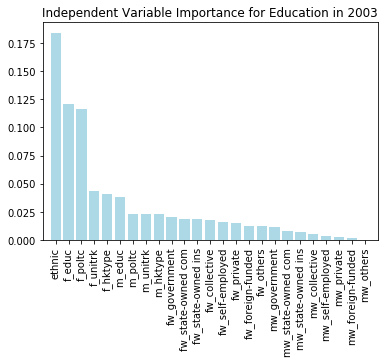

In [286]:
plt.title('Independent Variable Importance for Education in 2003')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [287]:
X=df2.drop(['income','educ','age','party','mnglvl01','wkunit01','suplvl01','sitetype', \
             'w_government','w_state-owned com','w_state-owned ins','w_collective',
             'w_self-employed','w_private','w_foreign-funded','w_others'], axis=1)
y=df2['income']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     10.44
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           3.29e-37
Time:                        22:13:52   Log-Likelihood:                 10764.
No. Observations:                5894   AIC:                        -2.148e+04
Df Residuals:                    5870   BIC:                        -2.132e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0164      0.003      4.924      0.000       0.010       0.023
ethnic                 0.0045      0.002      1.994      0.046    7.64e-05       0.009
f_educ                 0.0169      0.004      4.516      0.000       0.010       0.024
f_poltc                0.0017      0.001      1.290      0.197      -0.001       0.004
f_unitrk               0.0083      0.002      3.726      0.000       0.004       0.013
f_hktype              -0.0018      0.002     -1.105      0.269      -0.005       0.001
m_educ                 0.0202      0.005      4.030      0.000       0.010       0.030
m_poltc                0.0050      0.002      2.070      0.038       0.000       0.010
m_unitrk               0.0065      0.003      1.920      0.055      -0.000       0.013
m_hktype              -0.0015      0.002     -0.941      0.347      -0.005       0.002
fw_government          0.0049      0.003      1.864      0.062      -0.000       0.010
fw_state-owned com    -0.0055      0.002     -2.961      0.003      -0.009      -0.002
fw_state-owned ins     0.0033      0.002      1.532      0.126      -0.001       0.008
fw_collective         -0.0020      0.002     -0.839      0.402      -0.007       0.003
fw_self-employed      -0.0083      0.003     -2.853      0.004      -0.014      -0.003
fw_private             0.0072      0.004      1.696      0.090      -0.001       0.016
fw_foreign-funded      0.0140      0.010      1.385      0.166      -0.006       0.034
fw_others              0.0026      0.002      1.285      0.199      -0.001       0.007
mw_government          0.0125      0.005      2.594      0.010       0.003       0.022
mw_state-owned com     0.0030      0.003      1.204      0.229      -0.002       0.008
mw_state-owned ins     0.0005      0.003      0.156      0.876      -0.005       0.006
mw_collective         -0.0015      0.003     -0.512      0.609      -0.007       0.004
mw_self-employed       0.0056      0.004      1.344      0.179      -0.003       0.014
mw_private            -0.0052      0.006     -0.893      0.372      -0.017       0.006
mw_foreign-funded   8.558e-05      0.014      0.006      0.995      -0.027       0.027
mw_others              0.0014      0.003      0.545      0.586      -0.004       0.007
==============================================================================
Omnibus:                     7936.098   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3345311.980
Skew:                           7.415   Prob(JB):                         0.00
Kurtosis:                     118.767   Cond. No.                     6.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [288]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [289]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.207771
 2) f_educ                         0.132674
 3) f_poltc                        0.126455
 4) f_unitrk                       0.116858
 5) f_hktype                       0.057540
 6) m_educ                         0.049068
 7) m_poltc                        0.044486
 8) m_unitrk                       0.043418
 9) m_hktype                       0.027714
10) fw_government                  0.023793
11) fw_state-owned com             0.022973
12) fw_state-owned ins             0.021224
13) fw_collective                  0.019704
14) fw_self-employed               0.018326
15) fw_private                     0.014843
16) fw_foreign-funded              0.013271
17) fw_others                      0.012091
18) mw_government                  0.010437
19) mw_state-owned com             0.009344
20) mw_state-owned ins             0.007661
21) mw_collective                  0.006921
22) mw_self-employed               0.005554
23) mw_private                  

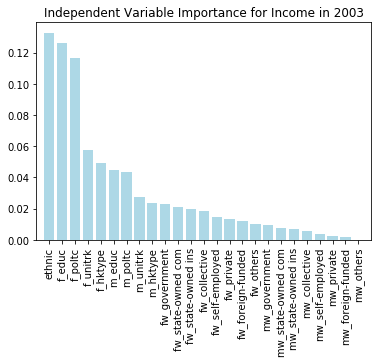

In [291]:
plt.title('Independent Variable Importance for Income in 2003')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [301]:
X=df2.drop(['income','educ','age','party','mnglvl01','wkunit01','suplvl01','sitetype', \
             'w_government','w_state-owned com','w_state-owned ins','w_collective',
             'w_self-employed','w_private','w_foreign-funded','w_others'], axis=1)
y=df2['mnglvl01']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mnglvl01   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.027
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           1.53e-06
Time:                        23:21:06   Log-Likelihood:                 2967.3
No. Observations:                5894   AIC:                            -5887.
Df Residuals:                    5870   BIC:                            -5726.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0189      0.012      1.519      0.129      -0.006       0.043
ethnic                 0.0064      0.008      0.760      0.448      -0.010       0.023
f_educ                 0.0252      0.014      1.800      0.072      -0.002       0.053
f_poltc                0.0150      0.005      2.970      0.003       0.005       0.025
f_unitrk               0.0031      0.008      0.371      0.710      -0.013       0.020
f_hktype              -0.0017      0.006     -0.273      0.785      -0.014       0.010
m_educ                 0.0313      0.019      1.659      0.097      -0.006       0.068
m_poltc                0.0199      0.009      2.186      0.029       0.002       0.038
m_unitrk               0.0147      0.013      1.163      0.245      -0.010       0.040
m_hktype               0.0003      0.006      0.046      0.963      -0.012       0.012
fw_government          0.0065      0.010      0.654      0.513      -0.013       0.026
fw_state-owned com    -0.0102      0.007     -1.469      0.142      -0.024       0.003
fw_state-owned ins    -0.0089      0.008     -1.089      0.276      -0.025       0.007
fw_collective         -0.0055      0.009     -0.619      0.536      -0.023       0.012
fw_self-employed      -0.0028      0.011     -0.261      0.794      -0.024       0.019
fw_private             0.0119      0.016      0.746      0.456      -0.019       0.043
fw_foreign-funded      0.0252      0.038      0.662      0.508      -0.049       0.100
fw_others              0.0027      0.008      0.362      0.717      -0.012       0.018
mw_government          0.0479      0.018      2.656      0.008       0.013       0.083
mw_state-owned com     0.0054      0.009      0.564      0.573      -0.013       0.024
mw_state-owned ins     0.0068      0.011      0.598      0.550      -0.015       0.029
mw_collective          0.0074      0.011      0.671      0.502      -0.014       0.029
mw_self-employed       0.0076      0.016      0.491      0.624      -0.023       0.038
mw_private             0.0010      0.022      0.046      0.964      -0.042       0.044
mw_foreign-funded     -0.0670      0.052     -1.295      0.195      -0.169       0.034
mw_others              0.0099      0.010      0.998      0.318      -0.010       0.029
==============================================================================
Omnibus:                     3911.397   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40660.133
Skew:                           3.173   Prob(JB):                         0.00
Kurtosis:                      14.193   Cond. No.                     6.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [302]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [303]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.155373
 2) f_educ                         0.152249
 3) f_poltc                        0.147901
 4) f_unitrk                       0.145166
 5) f_hktype                       0.059585
 6) m_educ                         0.051608
 7) m_poltc                        0.031161
 8) m_unitrk                       0.026463
 9) m_hktype                       0.025333
10) fw_government                  0.023444
11) fw_state-owned com             0.021696
12) fw_state-owned ins             0.021063
13) fw_collective                  0.018586
14) fw_self-employed               0.017750
15) fw_private                     0.016759
16) fw_foreign-funded              0.014928
17) fw_others                      0.014519
18) mw_government                  0.013972
19) mw_state-owned com             0.010710
20) mw_state-owned ins             0.009196
21) mw_collective                  0.008889
22) mw_self-employed               0.005797
23) mw_private                  

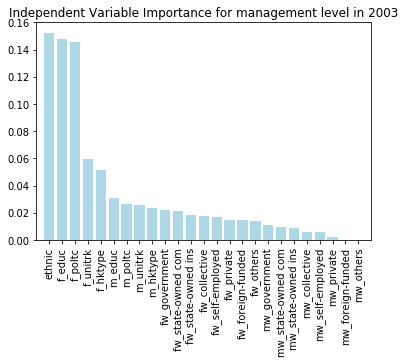

In [305]:
plt.title('Independent Variable Importance for management level in 2003')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [306]:
X=df2.drop(['income','educ','age','party','mnglvl01','wkunit01','suplvl01','sitetype', \
             'w_government','w_state-owned com','w_state-owned ins','w_collective',
             'w_self-employed','w_private','w_foreign-funded','w_others'], axis=1)
y=df2['suplvl01']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               suplvl01   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     17.36
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           8.81e-68
Time:                        23:22:11   Log-Likelihood:                -2687.6
No. Observations:                5894   AIC:                             5423.
Df Residuals:                    5870   BIC:                             5583.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3204      0.033      9.842      0.000       0.257       0.384
ethnic                 0.0402      0.022      1.833      0.067      -0.003       0.083
f_educ                 0.0413      0.037      1.129      0.259      -0.030       0.113
f_poltc                0.0106      0.013      0.802      0.423      -0.015       0.036
f_unitrk              -0.0703      0.022     -3.210      0.001      -0.113      -0.027
f_hktype              -0.0384      0.016     -2.377      0.018      -0.070      -0.007
m_educ                -0.2170      0.049     -4.410      0.000      -0.313      -0.121
m_poltc               -0.0283      0.024     -1.192      0.233      -0.075       0.018
m_unitrk               0.1165      0.033      3.523      0.000       0.052       0.181
m_hktype               0.0642      0.016      3.981      0.000       0.033       0.096
fw_government          0.0896      0.026      3.463      0.001       0.039       0.140
fw_state-owned com     0.1102      0.018      6.092      0.000       0.075       0.146
fw_state-owned ins     0.1084      0.021      5.088      0.000       0.067       0.150
fw_collective          0.0898      0.023      3.877      0.000       0.044       0.135
fw_self-employed      -0.0124      0.029     -0.436      0.663      -0.068       0.044
fw_private             0.0409      0.042      0.980      0.327      -0.041       0.123
fw_foreign-funded     -0.0321      0.099     -0.323      0.747      -0.227       0.163
fw_others             -0.0740      0.020     -3.746      0.000      -0.113      -0.035
mw_government          0.1187      0.047      2.521      0.012       0.026       0.211
mw_state-owned com     0.0913      0.025      3.684      0.000       0.043       0.140
mw_state-owned ins     0.0863      0.030      2.919      0.004       0.028       0.144
mw_collective          0.0845      0.029      2.947      0.003       0.028       0.141
mw_self-employed       0.0122      0.041      0.301      0.764      -0.067       0.092
mw_private            -0.0166      0.057     -0.289      0.772      -0.129       0.096
mw_foreign-funded     -0.1580      0.135     -1.170      0.242      -0.423       0.107
mw_others              0.1020      0.026      3.933      0.000       0.051       0.153
==============================================================================
Omnibus:                       14.396   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.001   Jarque-Bera (JB):              544.106
Skew:                          -0.121   Prob(JB):                    7.06e-119
Kurtosis:                       1.531   Cond. No.                     6.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [307]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [308]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.163337
 2) f_educ                         0.157340
 3) f_poltc                        0.138072
 4) f_unitrk                       0.134336
 5) f_hktype                       0.052827
 6) m_educ                         0.047400
 7) m_poltc                        0.042962
 8) m_unitrk                       0.029324
 9) m_hktype                       0.028049
10) fw_government                  0.027896
11) fw_state-owned com             0.024458
12) fw_state-owned ins             0.022675
13) fw_collective                  0.017335
14) fw_self-employed               0.016922
15) fw_private                     0.016702
16) fw_foreign-funded              0.016232
17) fw_others                      0.011925
18) mw_government                  0.011905
19) mw_state-owned com             0.011840
20) mw_state-owned ins             0.009135
21) mw_collective                  0.006711
22) mw_self-employed               0.005788
23) mw_private                  

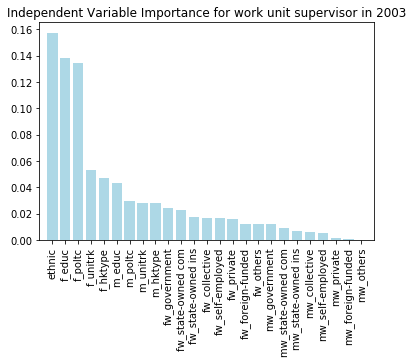

In [310]:
plt.title('Independent Variable Importance for work unit supervisor in 2003')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()